In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch, RegularPolygon
from matplotlib import cm, colors
import matplotlib

import numpy as np
import pandas as pd

import os
import scanpy as sc

In [2]:
import scipy.stats as stats

In [3]:
harmo_df = pd.read_csv("/home/comp/cszrwang/project/GMGAT4Deconv/figures/mean_out_her_breast_20_seed1.model.csv")
harmo_df

B cells  Dendritic cells  Endothelial cells  Epithelial cells  \
0     0.000100         0.004417           0.000732      8.038652e-01   
1     0.340306         0.051483           0.128867      2.111372e-05   
2     0.000792         0.058987           0.095950      2.086484e-01   
3     0.004975         0.152888           0.182554      9.204699e-10   
4     0.003068         0.151035           0.098685      9.116880e-07   
...        ...              ...                ...               ...   
2513  0.013130         0.127734           0.025470      4.128771e-02   
2514  0.209071         0.066338           0.053916      2.123518e-03   
2515  0.000326         0.039245           0.014802      2.626384e-05   
2516  0.031255         0.059875           0.397675      2.168490e-06   
2517  0.375733         0.078930           0.143066      1.189095e-05   

      Fibroblasts  Monocytes and Macrophages  NK cells       PCs       PVL  \
0        0.000079                   0.165242  0.020665  0.000011  0.004007   
1        0.052862                   0.222837  0.019259  0.119423  0.001343   
2        0.051697                   0.000510  0.101534  0.415104  0.028114   
3        0.083098                   0.522458  0.001000  0.007563  0.029472   
4        0.077995                   0.044949  0.028854  0.220388  0.025110   
...           ...                        ...       ...       ...       ...   
2513     0.047898                   0.007956  0.083002  0.221946  0.121811   
2514     0.059946                   0.021911  0.022638  0.095466  0.007546   
2515     0.007038                   0.740622  0.043005  0.007476  0.015127   
2516     0.106646                   0.219820  0.013743  0.018876  0.012964   
2517     0.088234                   0.016596  0.001034  0.014505  0.010548   

      T cells CD4  T cells CD8  
0        0.000081     0.000801  
1        0.052486     0.011112  
2        0.000279     0.038386  
3        0.015927     0.000065  
4        0.175739     0.174176  
...           ...          ...  
2513     0.225842     0.083923  
2514     0.316919     0.144126  
2515     0.104833     0.027499  
2516     0.128292     0.010851  
2517     0.120847     0.150494  

[2518 rows x 11 columns]

In [4]:
coordinates = pd.read_csv("/home/comp/cszrwang/data/Breast/cytospace/breast_st_cor_2.txt",delimiter='\t')
coordinates

x    y
0     50  102
1     59   19
2     14   94
3     43    9
4     47   13
...   ..  ...
2513  24   64
2514  31   77
2515  58   42
2516  60   30
2517  45   27

[2518 rows x 2 columns]

In [5]:
st_ad = sc.read_h5ad('/home/comp/cszrwang/data/Breast/cytospace/breast_st_2.h5ad')
st_df = st_ad.to_df()

In [6]:
harmo = pd.read_csv("/home/comp/cszrwang/project/GMGAT4Deconv/figures/mean_out_her_breast_20_seed1.model.csv")['Epithelial cells']
stdgcn = pd.read_csv("/home/comp/cszrwang/results/Deconvolution/results/Breast_2/StdGCN/predict_result.csv")['Epithelial cells']
dwls = pd.read_csv("/home/comp/cszrwang/results/Deconvolution/results/Breast_2/SpatialDWLS/SpatialDWLS_result.csv")['Epithelial cells']
spacel = pd.read_csv("/home/comp/cszrwang/results/Deconvolution/results/Breast_2/SPACEL/SPACEL_result.csv")['Epithelial cells']
rctd = pd.read_csv("/home/comp/cszrwang/results/Deconvolution/results/Breast_2/RCTD/RCTD_output.csv")['Epithelial cells']
redeconve = pd.read_csv("/home/comp/cszrwang/results/Deconvolution/results/Breast_2/Redeconve/Redeconve.csv")['Epithelial cells']
card = pd.read_csv("/home/comp/cszrwang/results/Deconvolution/results/Breast_2/CARD/CARD_output.csv")['Epithelial cells']

In [7]:
coordinates = pd.read_csv("/home/comp/cszrwang/data/Breast/cytospace/breast_st_cor_2.txt",delimiter='\t')
cyto_anno = pd.read_csv("/home/comp/cszrwang/data/Breast/cytospace/fractional_abundances_by_spot_cytospace.csv")
cyto_anno['x_y'] = cyto_anno['SpotID'].map(lambda x: x.split('__')[1])
cyto_anno['x'] = cyto_anno['x_y'].map(lambda x: int(x.split('x')[0]))
cyto_anno['y'] = cyto_anno['x_y'].map(lambda x: int(x.split('x')[1]))
cyto_anno_cor = pd.merge(coordinates, cyto_anno, how='left', on=['x', 'y'])
cyto_anno_cor['cancer'] = (cyto_anno_cor['Epithelial cells'] > 0).astype(int)
cancer_anno = cyto_anno_cor['cancer']

In [8]:
mal_list = [harmo, stdgcn, dwls, spacel, rctd, redeconve, card, cancer_anno]
name_list = ['SPACEL', 'StdGCN', 'SpatialDWLS', 'HarmoDecon', 'RCTD', 'Redeconve', 'CARD', 'cancer_region']

In [9]:
def format_label(label,max_length=14,max_lines=3):
    label_words = label.split(' ')
    label_chunks = []
    chunk = ''
    for word in label_words:
        if len(chunk)==0:
            if len(word)>max_length:
                word = word[:max_length]+'...'
                label_chunks.append(word)
            else:
                chunk += word
        elif len(chunk)+len(word)<=(max_length-1):
            chunk = chunk+' '+word
        else:
            label_chunks.append(chunk)
            chunk = word
    if len(chunk)>0:
        label_chunks.append(chunk)
    
    if len(label_chunks)>max_lines:
        label_chunks = label_chunks[:max_lines]
        last_line = label_chunks[-1]
        if len(last_line)>(max_length-3):
            label_chunks[-1] = last_line[:max_length]+'...'
        else: 
            label_chunks[-1] = last_line+'...'

    return '\n'.join(label_chunks)

In [10]:
def plot_results_bulk_ST_by_spot(coordinates, metadata, dir_out, output_prefix, geometry='honeycomb', num_cols=3):
 
    # Define output files
    fout_png_all = os.path.join(dir_out, f"{output_prefix}cell_type_assignments_by_spot.png")
    fout_pdf_all = os.path.join(dir_out, f"{output_prefix}cell_type_assignments_by_spot.pdf")
    
#     coordinates = coordinates.loc[metadata.index,:]
#     cell_types = list(metadata.columns)[:-1]
    cell_types = list(metadata.columns)
    cell_types = list(cell_types)
#     cell_types.insert(0,'Total cells')

    X = coordinates.iloc[:,0]
    Y = coordinates.iloc[:,1]
    
    # distinguish between row/col indices and coordinates
    # based on range (500) and type (int vs. float) of values
    scale = Y.max() < 500 and ((Y - Y.round()).abs() < 1e-5).all()

    # define representative interval between each adjacent spot/point
    y_int = 1 if scale else np.median(np.unique(np.diff(np.sort(np.unique(Y)))))
    x_int = 1 if scale else np.median(np.unique(np.diff(np.sort(np.unique(X)))))
    
    if geometry == 'honeycomb' and scale:
        print('Detecting row and column indexing of Visium data; rescaling for coordinates')
        
        # Rotate
        X_prev = X
        Y_prev = Y
        X = Y_prev
        Y = 1-X_prev
        
        # Rescale
        Y = 1.75*Y

    elif geometry == 'square' and scale:
        print('Detecting row and column indexing of legacy ST data; rotating for coordinates')
        
        # Rotate
        X_prev = X
        Y_prev = Y
        X = Y_prev
        Y = 1-X_prev

    else:        
        # Rotate 
        Y = 1-Y
        
    if geometry == 'honeycomb':
        hex_vert = 6

        if scale:
            hex_rot = 0
            hex_rad = y_int
            hex_rad = hex_rad + 0.2*hex_rad

        else:
            hex_rot = 0
            hex_rad = x_int
            hex_rad = hex_rad + 0.28*hex_rad

    elif geometry == 'square':
        hex_vert = 4
        hex_rot = 45
        interval = y_int
        hex_rad = 0.5*np.sqrt(2*interval**2)

    else:
        print("Unknown geometry specified.")
        exit()

    num_rows = int(len(cell_types)/num_cols)
    if num_rows*num_cols < len(cell_types):
        num_rows = num_rows+1
    width = max(X)-min(X)
    height = max(Y)-min(Y)

#     plt.rc('font', **{'family': 'sans-serif', 'sans-serif': ['sans-serif'], 'size':'12'})
    plt.rcParams['figure.dpi'] = 450
    plt.rcParams['savefig.dpi'] = 450

    fig, axes = plt.subplots(num_rows,num_cols,figsize=(width/height*3*num_cols,3*num_rows))
    full_frac = 0.047 * (3*num_rows / (width/height*3*num_cols))
    k = 0
    for i in range(num_rows):
        for j in range(num_cols):

            ax = axes[i,j]

            if k >= len(cell_types):
                ax.axis('off')
            else:
                ct = cell_types[k]
                ax.set_aspect('equal')

                node_assignment = metadata.loc[:,ct]

                viridis = cm.get_cmap('viridis')
                norm = matplotlib.colors.Normalize(min(node_assignment), max(node_assignment))

                node_assignment = (1/max(node_assignment))*node_assignment
                colors = viridis(node_assignment)

                for x, y, c in zip(X, Y, colors):
                    hex = RegularPolygon((x, y), numVertices=hex_vert, radius=hex_rad, 
                                         orientation=np.radians(hex_rot), 
                                         facecolor=c, edgecolor=None)
                    ax.add_patch(hex)

                # Also add scatter points in hexagon centres - not sure why this line has to be here
                ax.scatter(X, Y, c=[c[0] for c in colors],alpha=0)
                ct_label = ct
                # Reformat labels that are too long
                if len(ct_label)>14:
                    ct_label = format_label(ct_label)
                ax.set_title(ct_label)
                cax = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=viridis),ax=ax,label='',fraction=0.036, pad = 0.04)
                
                ticks = cax.get_ticks()
            
                ticks = cax.get_ticks()

                new_ticks = np.linspace(norm.vmin, norm.vmax, len(ticks))

                cax.set_ticks(new_ticks)
                cax.set_ticklabels([f'{tick:.2f}' for tick in new_ticks])

                ax.axis('off')
            k += 1

    fig.tight_layout()
    fig.subplots_adjust(top=0.92)
#     fig.suptitle('Distribution of Cancer Epithelial Cells')
    plt.show()
    fig.savefig(fout_png_all, facecolor="w", bbox_inches='tight')
    fig.savefig(fout_pdf_all, facecolor="w", bbox_inches='tight')

In [11]:
# # Draw Distribution Figures
# gene_1 = np.log(st_df['PDZK1IP1']+0.1)
# gene_1.index = harmo.index
# gene_2 = np.log(st_df['STAC2']+0.1)
# gene_2.index = harmo.index
# distribution = [harmo, stdgcn, dwls, spacel, rctd, redeconve, card]
dis_df = pd.DataFrame(mal_list).T
dis_columns = name_list.copy()
dis_df.columns = dis_columns
dis_df

SPACEL    StdGCN  SpatialDWLS  HarmoDecon      RCTD  Redeconve  \
0     8.038652e-01  0.149868     0.706246    0.729145  0.534783   0.671209   
1     2.111372e-05  0.212166     0.000000    0.094729  0.081976   0.275514   
2     2.086484e-01  0.245391     0.316000    0.255785  0.238099   0.168021   
3     9.204699e-10  0.034473     0.000000    0.000000  0.027722   0.000000   
4     9.116880e-07  0.050433     0.063161    0.000000  0.031315   0.042869   
...            ...       ...          ...         ...       ...        ...   
2513  4.128771e-02  0.164840     0.257728    0.162033  0.178574   0.278827   
2514  2.123518e-03  0.025758     0.168746    0.036812  0.099139   0.191573   
2515  2.626384e-05  0.027960     0.201378    0.109209  0.100878   0.104996   
2516  2.168490e-06  0.053812     0.000000    0.000000  0.033082   0.081389   
2517  1.189095e-05  0.031153     0.000000    0.095271  0.061988   0.028859   

          CARD  cancer_region  
0     0.387556            1.0  
1     0.098217            0.0  
2     0.203875            0.0  
3     0.061262            0.0  
4     0.041040            0.0  
...        ...            ...  
2513  0.232327            0.0  
2514  0.101519            0.0  
2515  0.159061            0.0  
2516  0.042083            0.0  
2517  0.094919            0.0  

[2518 rows x 8 columns]

In [12]:
dir_out = "/home/comp/cszrwang/results/Deconvolution/results/Breast_2/Figures/"

In [13]:
cancer_anno = cyto_anno_cor[['x', 'y', 'cancer']]

In [14]:
# import pandas as pd
# import numpy as np
from scipy.spatial.distance import cdist

In [15]:
for idx, row in cancer_anno.iterrows():
    if row['cancer'] == 1:
        distances = cdist(cancer_anno[['x', 'y']].values, [cancer_anno.loc[idx, ['x', 'y']]])
#         print((cancer_anno['cancer'] == 1).shape)
        spatial_neighbors = cancer_anno[(distances < 2.5).squeeze() & (cancer_anno['cancer'] == 1)]
        
        if len(spatial_neighbors) == 1:  # Itself will be in the list
            cancer_anno.at[idx, 'cancer'] = 0

In [16]:
cancer_anno['cancer'].sum()

532

In [17]:
mal_list = [spacel, stdgcn, dwls, harmo, rctd, redeconve, card, cancer_anno['cancer']]
name_list = ['SPACEL', 'StdGCN', 'SpatialDWLS', 'HarmoDecon', 'RCTD', 'Redeconve', 'CARD', 'Region Annotations']
dis_df = pd.DataFrame(mal_list).T
dis_columns = name_list.copy()
dis_df.columns = dis_columns
dis_df

SPACEL    StdGCN  SpatialDWLS    HarmoDecon      RCTD  Redeconve  \
0     0.729145  0.149868     0.706246  8.038652e-01  0.534783   0.671209   
1     0.094729  0.212166     0.000000  2.111372e-05  0.081976   0.275514   
2     0.255785  0.245391     0.316000  2.086484e-01  0.238099   0.168021   
3     0.000000  0.034473     0.000000  9.204699e-10  0.027722   0.000000   
4     0.000000  0.050433     0.063161  9.116880e-07  0.031315   0.042869   
...        ...       ...          ...           ...       ...        ...   
2513  0.162033  0.164840     0.257728  4.128771e-02  0.178574   0.278827   
2514  0.036812  0.025758     0.168746  2.123518e-03  0.099139   0.191573   
2515  0.109209  0.027960     0.201378  2.626384e-05  0.100878   0.104996   
2516  0.000000  0.053812     0.000000  2.168490e-06  0.033082   0.081389   
2517  0.095271  0.031153     0.000000  1.189095e-05  0.061988   0.028859   

          CARD  Region Annotations  
0     0.387556                 1.0  
1     0.098217                 0.0  
2     0.203875                 0.0  
3     0.061262                 0.0  
4     0.041040                 0.0  
...        ...                 ...  
2513  0.232327                 0.0  
2514  0.101519                 0.0  
2515  0.159061                 0.0  
2516  0.042083                 0.0  
2517  0.094919                 0.0  

[2518 rows x 8 columns]

Detecting row and column indexing of Visium data; rescaling for coordinates


/tmp/ipykernel_458730/3776396564.py:98: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('viridis')


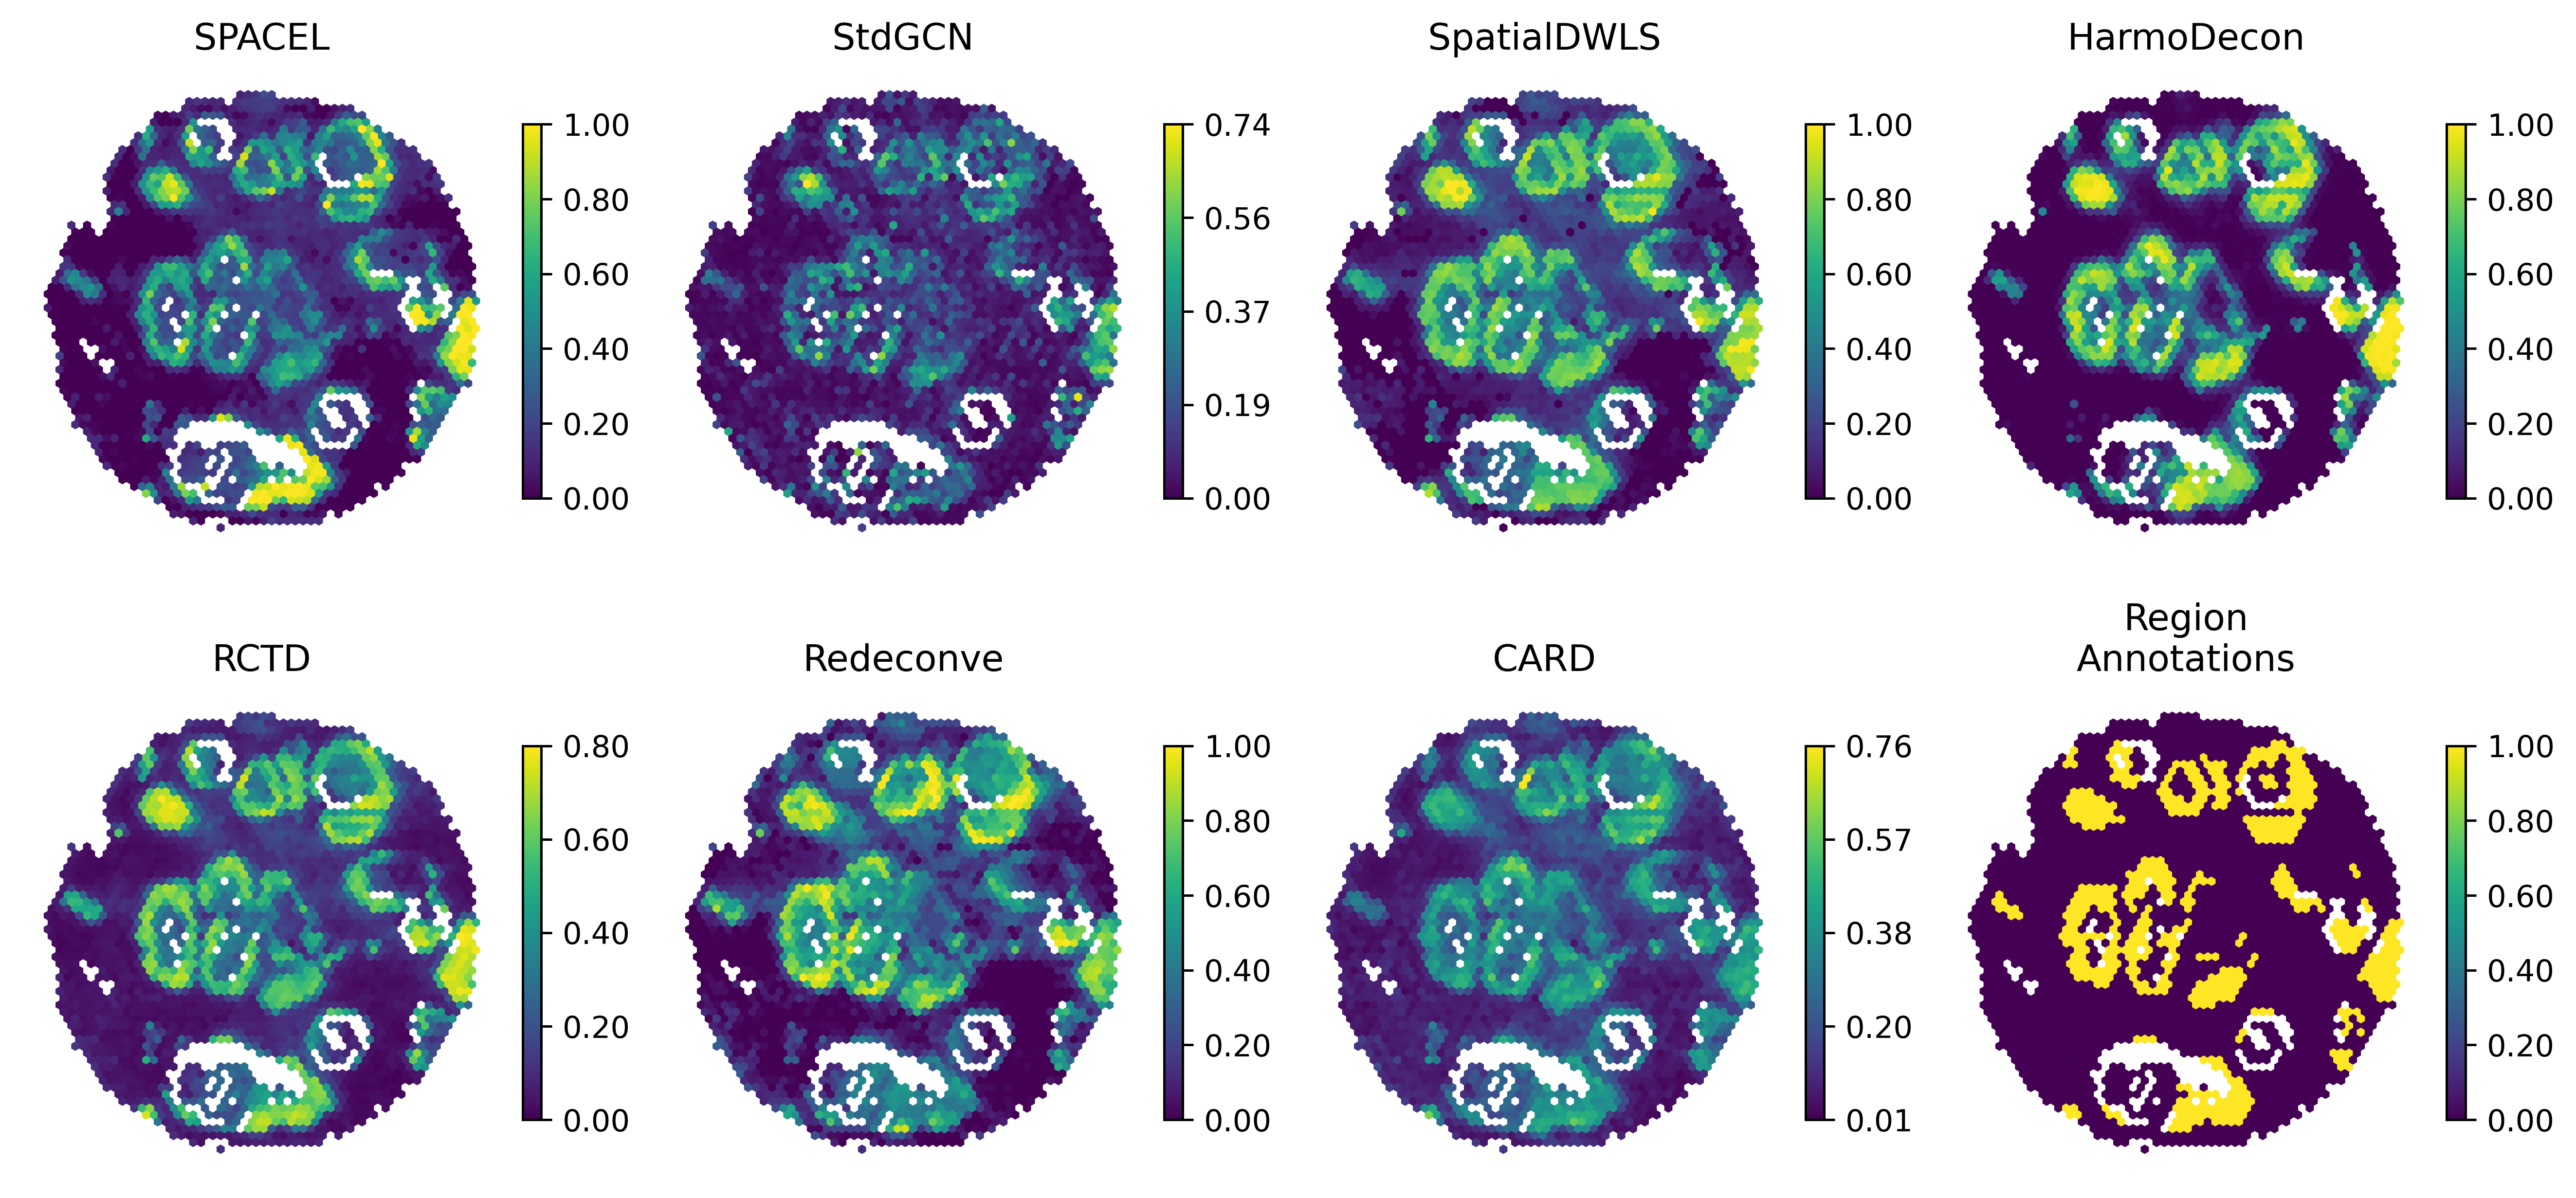

In [18]:
output_prefix = "breast_2_new"
plot_results_bulk_ST_by_spot(coordinates, dis_df, dir_out, output_prefix, geometry='honeycomb', num_cols=4)

In [21]:
import seaborn as sns
import scipy.stats as stats

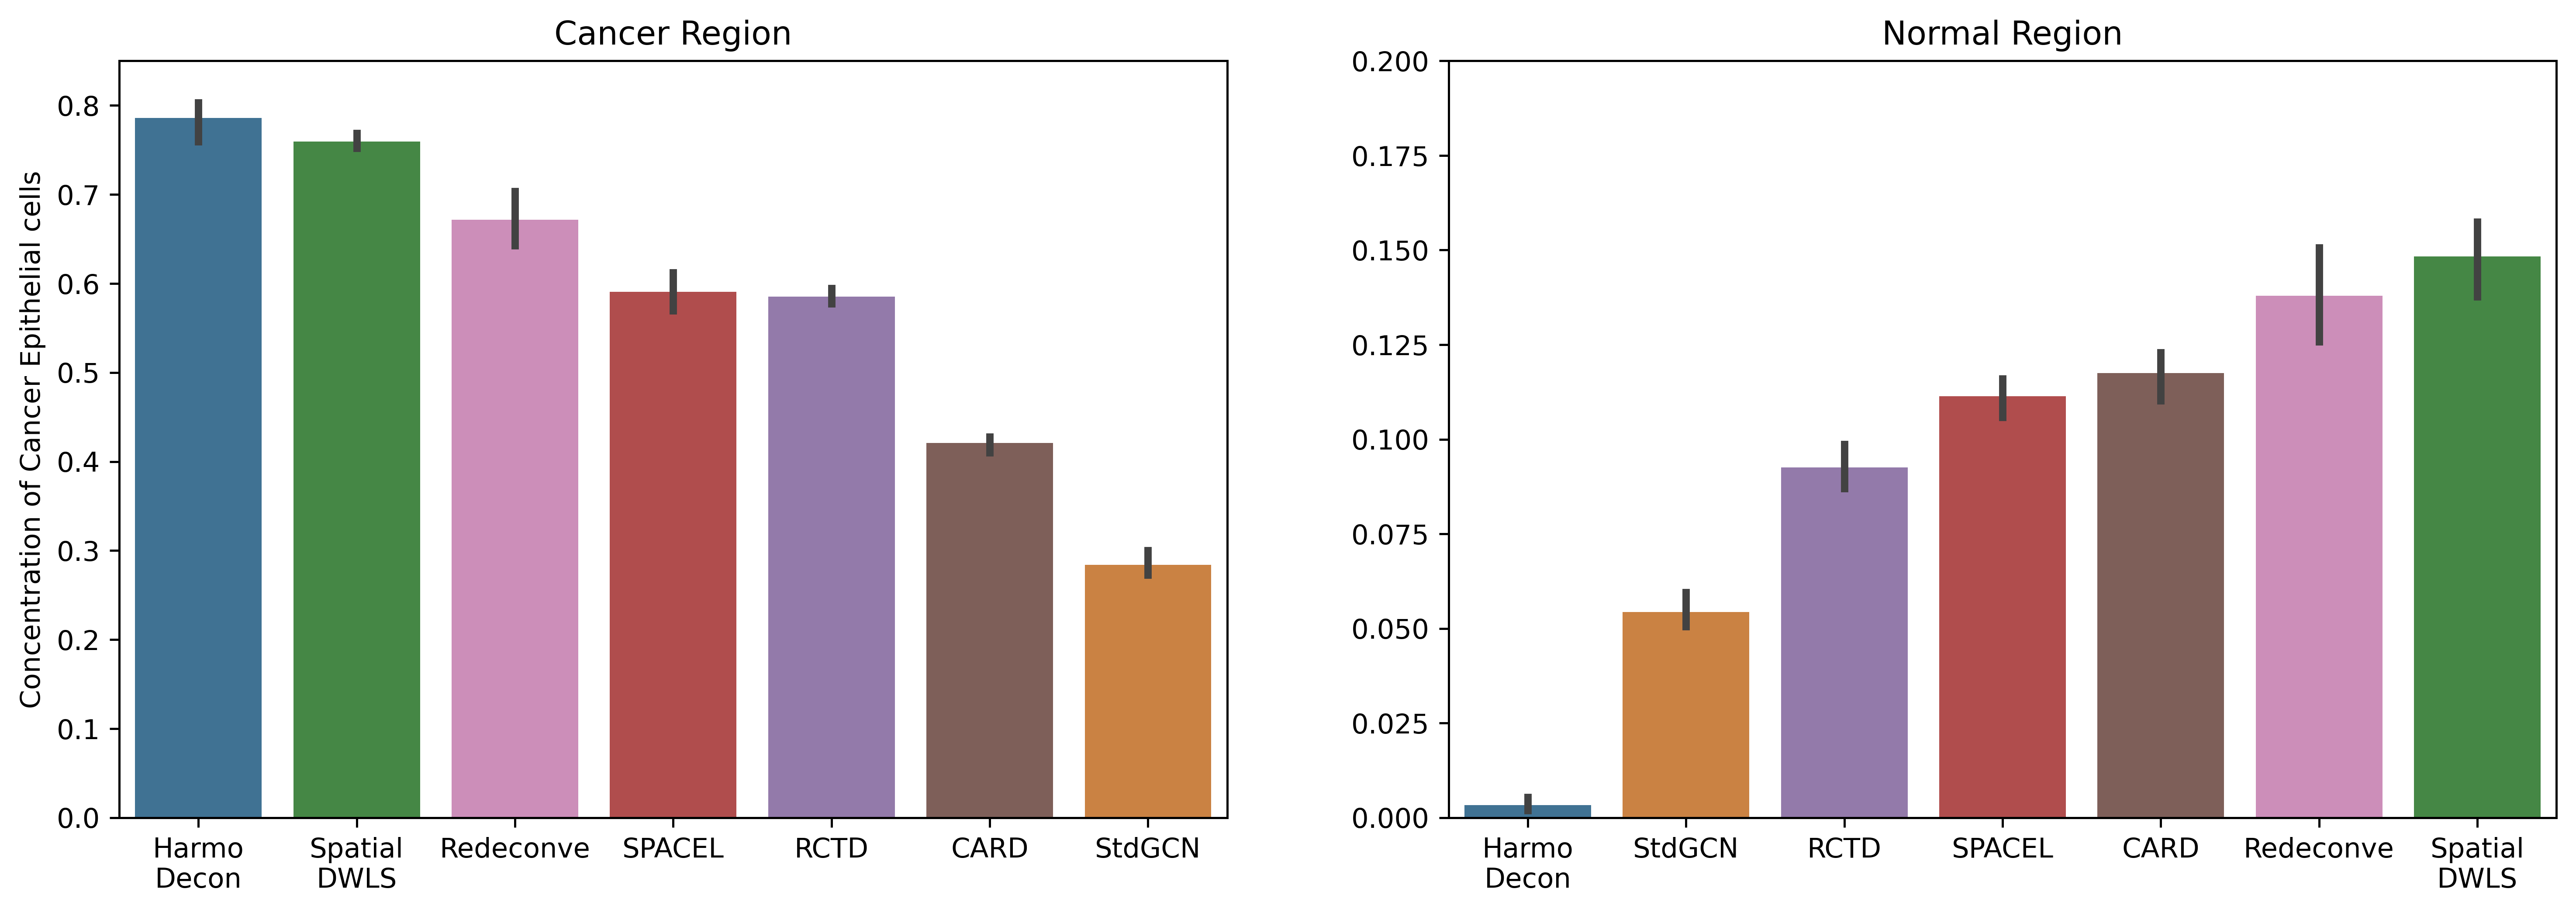

In [22]:
fig,axes = plt.subplots(ncols=2,nrows=1,figsize=(16,5))
# for i, result in enumerate(result_list):
cancer = cancer_anno['cancer'] == 1
no_cancer = cancer_anno['cancer'] == 0
cancer_df = pd.DataFrame([harmo[cancer], stdgcn[cancer], dwls[cancer], spacel[cancer], rctd[cancer], redeconve[cancer], card[cancer]]).T
cancer_df.columns = ['Harmo\nDecon', 'StdGCN', 'Spatial\nDWLS', 'SPACEL', 'RCTD', 'Redeconve', 'CARD']
medians = cancer_df.median().sort_values(ascending=False)
order = medians.index.tolist()


no_cancer_df = pd.DataFrame([harmo[no_cancer], stdgcn[no_cancer], dwls[no_cancer], spacel[no_cancer], rctd[no_cancer], redeconve[no_cancer], card[no_cancer]]).T
no_cancer_df.columns = ['Harmo\nDecon', 'StdGCN', 'Spatial\nDWLS', 'SPACEL', 'RCTD', 'Redeconve', 'CARD']
medians = no_cancer_df.median().sort_values()
order_no = medians.index.tolist()

color_mapping = {
    "Harmo\nDecon": "#3275a1",
    "StdGCN": "#e1812c",
    "Spatial\nDWLS": "#3a923a",
    "SPACEL": "#c03d3d",
    "RCTD": "#9372b2",
    "CARD": "#845b53",
    "Redeconve": "#d684bd"
}

sns.barplot(data=cancer_df, ax=axes[0], estimator="median", order=order, palette=color_mapping)
sns.barplot(data=no_cancer_df, ax=axes[1], estimator="median", order=order_no, palette=color_mapping)

# sns.catplot(data=harmo[cancer], ax=axes[0], kind="bar")
# sns.catplot(data=harmo[no_cancer], ax=axes[1], kind="bar")
# print(result_cancer.median(), result_no.median())
# statistic, p_value = stats.ttest_ind(result_cancer, result_no)
axes[0].set_title("Cancer Region")
# axes[0].set_xticks(ticks=np.arange(len(name_list)) ,labels=name_list)
axes[0].set_ylim([0, 0.85])
axes[0].set_ylabel("Concentration of Cancer Epithelial cells")
axes[1].set_title("Normal Region")
# axes[1].set_xticks(ticks=np.arange(len(name_list)), labels=name_list)
axes[1].set_ylim([0, 0.2])
# axes[i].text(0.5, 0.92, f't: {statistic:.2e}', ha='center', va='center', transform=axes[i].transAxes, color='red')
# axes[i].text(0.5, 0.88, f'p: {p_value:.2e}', ha='center', va='center', transform=axes[i].transAxes, color='red')
plt.savefig(dir_out+'/box_plot_cancer_new_2.jpg',dpi=300,bbox_inches='tight')
plt.show()

In [23]:
# Wilcoxon
default = np.array(harmo[cancer])
nan = ~np.isnan(default)
default = default[nan]
no_p = np.array(dwls[cancer])
no_p = no_p[nan]
statistic, p_value = stats.wilcoxon(default, no_p)

print("statistic", statistic)
print("p_value:", p_value)

statistic 58743.0
p_value: 0.000616870797067707


In [24]:
harmo[cancer].median()

0.785662525

In [25]:
default = np.array(harmo[no_cancer])
nan = ~np.isnan(default)
default = default[nan]
no_p = np.array(stdgcn[no_cancer])
no_p = no_p[nan]
statistic, p_value = stats.wilcoxon(default, no_p)

print("statistic", statistic)
print("p_value:", p_value)

statistic 872426.0
p_value: 8.008344173310896e-06


In [26]:
harmo[no_cancer].median()

0.00327307635

In [27]:
cell2location = pd.read_csv("/home/comp/cszrwang/results/Deconvolution/results/Breast_2/Cell2location/Cell2location_result.csv")
spotlight = pd.read_csv("/home/comp/cszrwang/results/Deconvolution/results/Breast_2/SPOTlight/SPOTlight_output.csv")['Epithelial cells']
stereoscope = pd.read_csv("/home/comp/cszrwang/results/Deconvolution/results/Breast_2/Stereoscope/Stereoscope_result.csv")['Epithelial cells']
dstg = pd.read_csv("/home/comp/cszrwang/results/Deconvolution/results/Breast_2/DSTG/predict_output.csv")['Epithelial.cells']
tangram = pd.read_csv("/home/comp/cszrwang/results/Deconvolution/results/Breast_2/Tangram/Tangram_result.csv")['Epithelial cells']

In [28]:
cell2location.reset_index()
cell2location = cell2location.drop('Unnamed: 0', axis=1)
cell2location

B cells  Dendritic cells  Endothelial cells  Epithelial cells  \
0      2.771939         0.832084           1.055861         25.725996   
1      3.766669         1.559758           0.585496          2.250134   
2      3.330526         1.268895           0.570049          7.966098   
3      1.574615         1.145222           0.645091          1.292600   
4      3.325916         0.791827           0.235054          0.994175   
...         ...              ...                ...               ...   
2513   3.107291         0.825968           0.414865          5.049593   
2514  12.018134         3.767840           1.783046          6.251100   
2515   0.570142         0.089566           0.153707          1.507791   
2516   2.758959         1.102869           2.251508          2.017899   
2517   2.134784         0.621424           0.484956          1.638390   

      Fibroblasts  Monocytes and Macrophages  NK cells       PCs       PVL  \
0        0.131700                   2.683910  0.621747  0.351505  0.451008   
1        0.321688                   1.533952  1.707828  0.683020  0.060141   
2        1.195157                   0.568968  1.870929  9.193388  0.344280   
3        0.739547                   1.968617  0.678880  0.082355  0.104068   
4        0.635913                   0.490557  2.183169  3.703565  0.165883   
...           ...                        ...       ...       ...       ...   
2513     0.740038                   2.037450  2.021863  1.457425  0.139087   
2514     0.728899                   0.976978  7.725116  2.389767  0.539714   
2515     0.140750                   1.027051  0.405108  0.297077  0.153413   
2516     0.636271                   2.721880  2.163718  0.607263  0.476268   
2517     0.783009                   0.565026  0.774686  0.755764  0.143164   

      T cells CD4  T cells CD8  
0        0.580251     0.741275  
1        1.090301     1.504007  
2        1.024996     0.561517  
3        0.280126     0.393842  
4        1.217756     1.346527  
...           ...          ...  
2513     1.555895     1.840330  
2514     7.527582    10.108402  
2515     0.242044     0.373765  
2516     1.279013     1.696335  
2517     0.812004     0.713647  

[2518 rows x 11 columns]

In [29]:
row_sums = cell2location.sum(axis=1)
cell2location = cell2location.div(row_sums, axis=0)
cell2location = cell2location['Epithelial cells']

In [30]:
mal_list = [spacel, stdgcn, dwls, harmo, rctd, redeconve, card, cell2location, spotlight, stereoscope, dstg, tangram]
name_list = ['SPACEL', 'STdGCN', 'SpatialDWLS', 'HarmoDecon', 'RCTD', 'Redeconve', 'CARD', 'Cell2Location', 'SPOTlight', 'Stereoscope', 'DSTG', 'Tangram']
dis_df = pd.DataFrame(mal_list).T
dis_columns = name_list.copy()
dis_df.columns = dis_columns
dis_df

SPACEL    STdGCN  SpatialDWLS    HarmoDecon      RCTD  Redeconve  \
0     0.729145  0.149868     0.706246  8.038652e-01  0.534783   0.671209   
1     0.094729  0.212166     0.000000  2.111372e-05  0.081976   0.275514   
2     0.255785  0.245391     0.316000  2.086484e-01  0.238099   0.168021   
3     0.000000  0.034473     0.000000  9.204699e-10  0.027722   0.000000   
4     0.000000  0.050433     0.063161  9.116880e-07  0.031315   0.042869   
...        ...       ...          ...           ...       ...        ...   
2513  0.162033  0.164840     0.257728  4.128771e-02  0.178574   0.278827   
2514  0.036812  0.025758     0.168746  2.123518e-03  0.099139   0.191573   
2515  0.109209  0.027960     0.201378  2.626384e-05  0.100878   0.104996   
2516  0.000000  0.053812     0.000000  2.168490e-06  0.033082   0.081389   
2517  0.095271  0.031153     0.000000  1.189095e-05  0.061988   0.028859   

          CARD  Cell2Location  SPOTlight  Stereoscope    DSTG   Tangram  
0     0.387556       0.715659   0.056572     0.191084  0.1840  0.237725  
1     0.098217       0.149382   0.018853     0.092828  0.0862  0.000077  
2     0.203875       0.285576   0.033736     0.034834  0.0738  0.009120  
3     0.061262       0.145155   0.000000     0.084263  0.0875  0.000633  
4     0.041040       0.065882   0.000000     0.055865  0.0466  0.000597  
...        ...            ...        ...          ...     ...       ...  
2513  0.232327       0.263139   0.041424     0.178873  0.1030  0.000030  
2514  0.101519       0.116156   0.020460     0.059622  0.0528  0.000024  
2515  0.159061       0.303965   0.044475     0.024497  0.0857  0.001029  
2516  0.042083       0.113928   0.010463     0.104791  0.0668  0.000034  
2517  0.094919       0.173800   0.021479     0.124840  0.0788  0.000141  

[2518 rows x 12 columns]

Detecting row and column indexing of Visium data; rescaling for coordinates


/tmp/ipykernel_458730/3776396564.py:98: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('viridis')


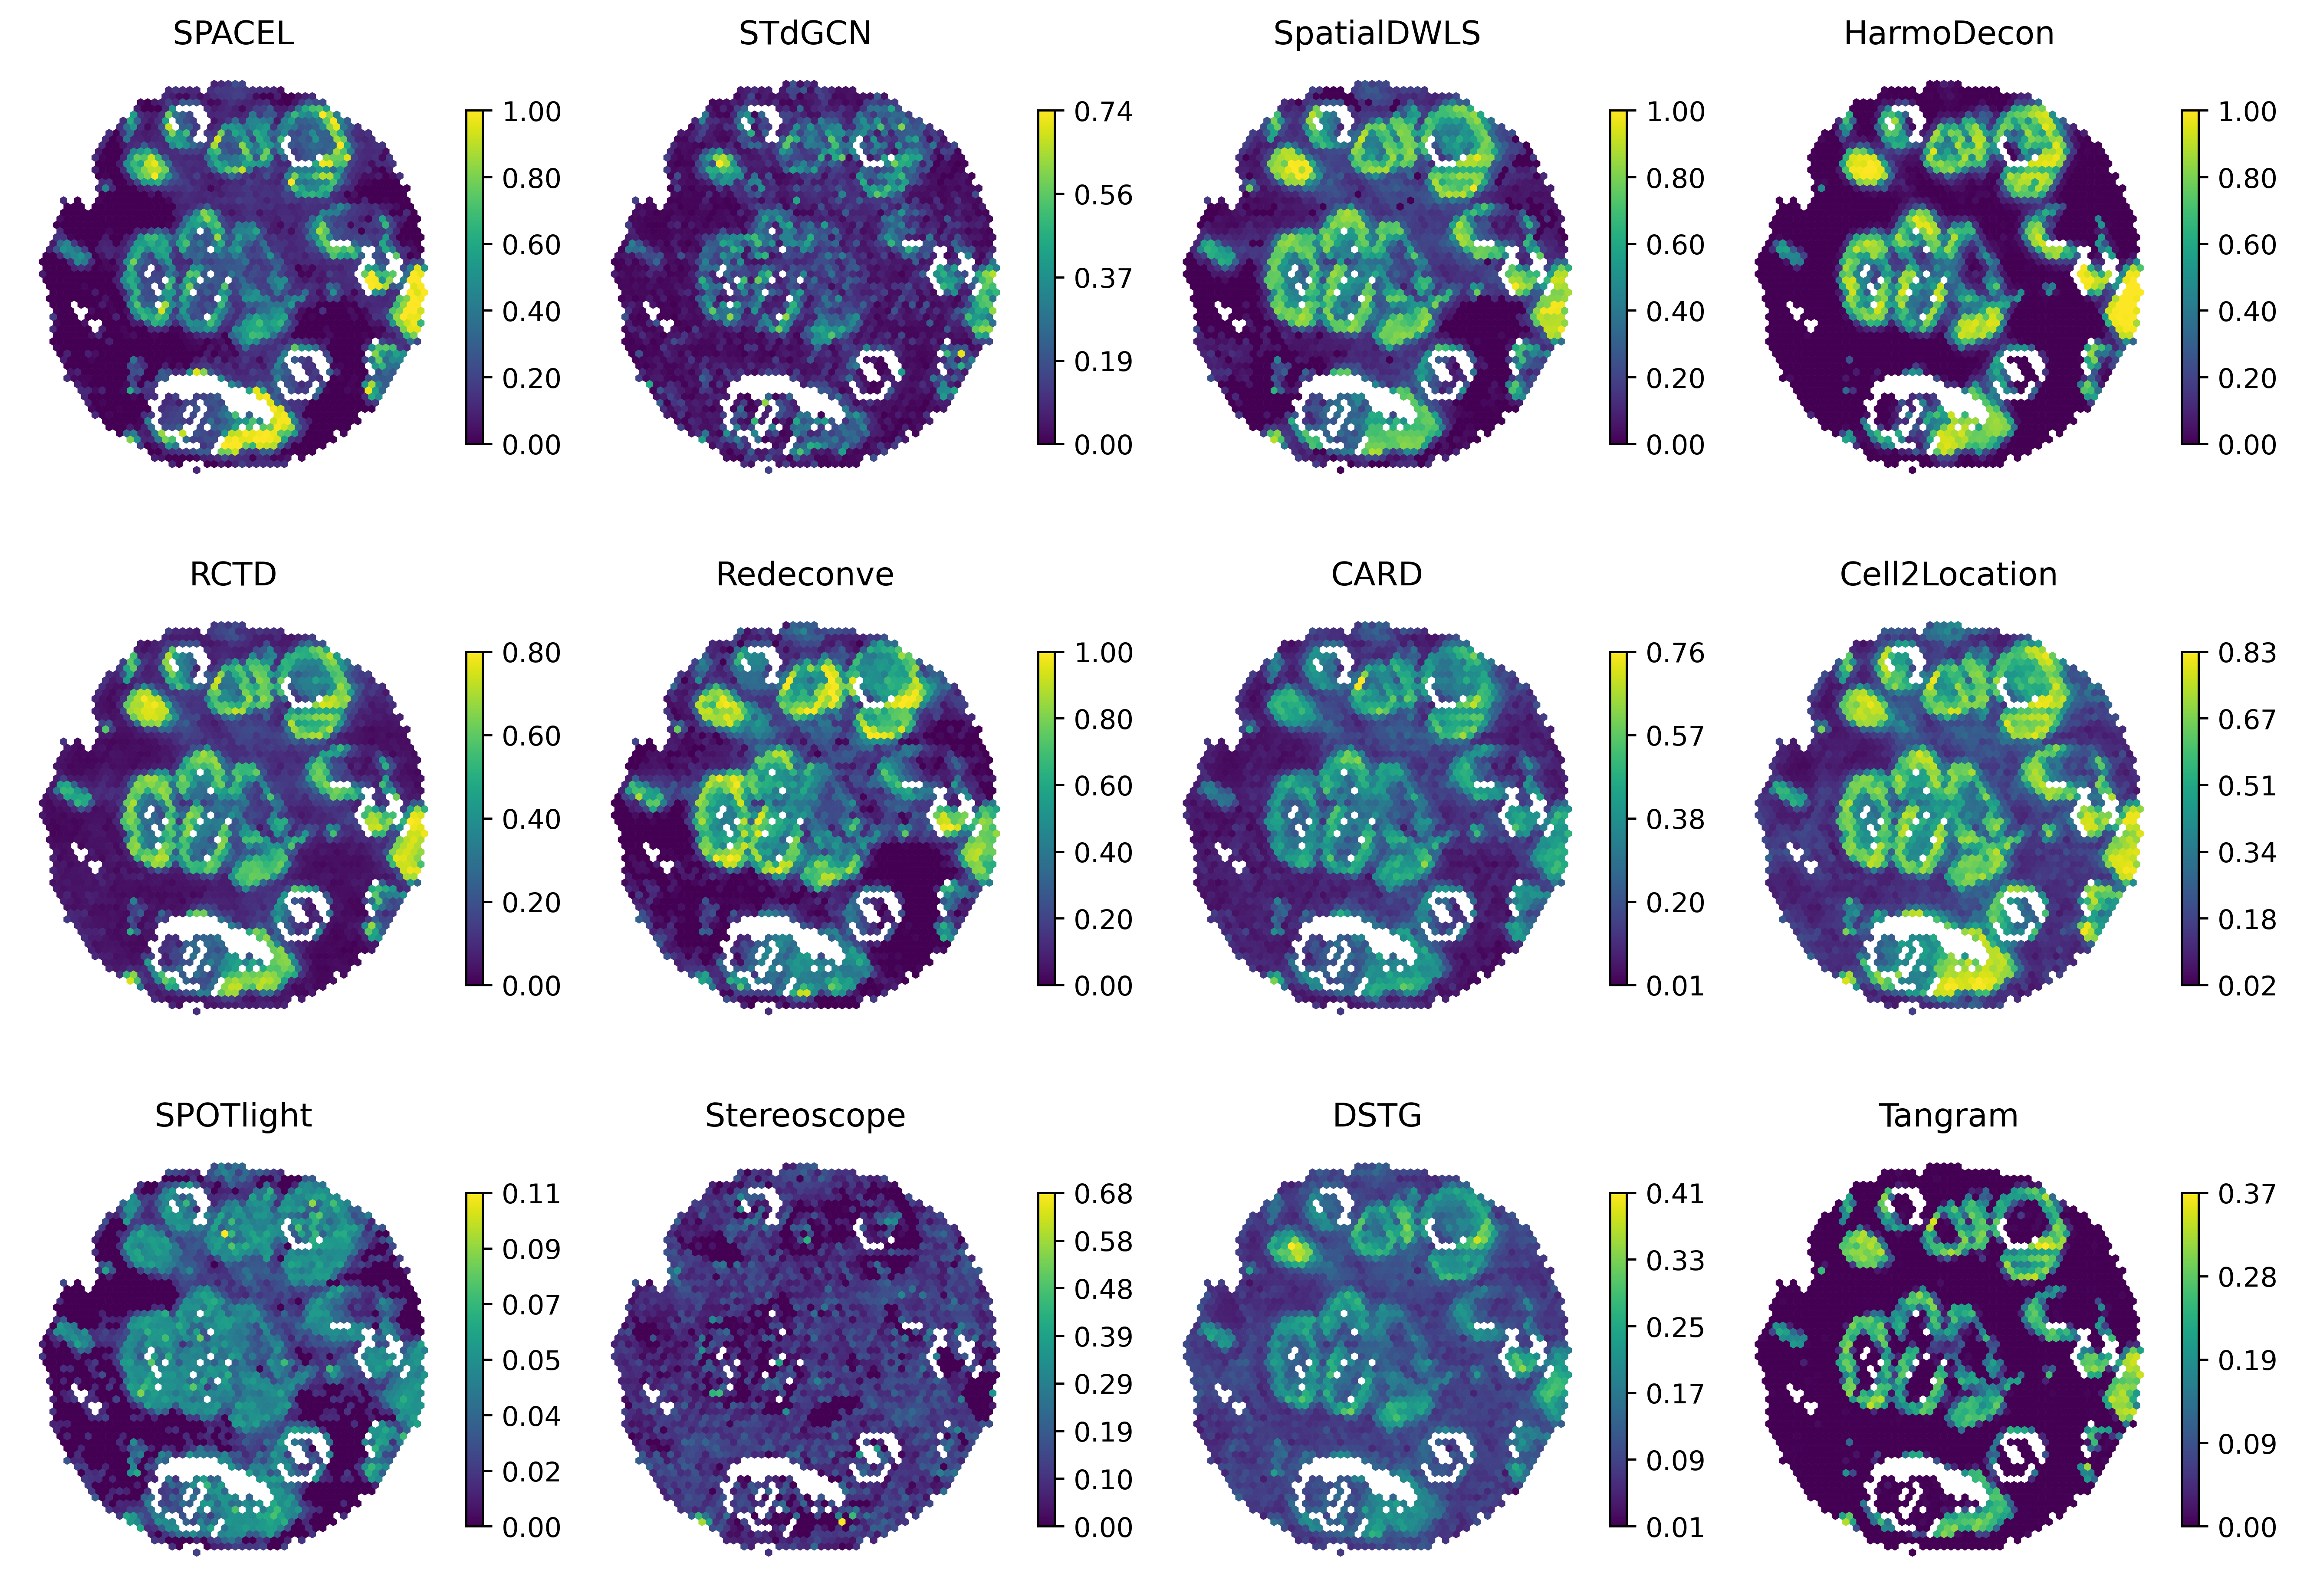

In [31]:
output_prefix = "breast_2_methods_12"
plot_results_bulk_ST_by_spot(coordinates, dis_df, dir_out, output_prefix, geometry='honeycomb', num_cols=4)

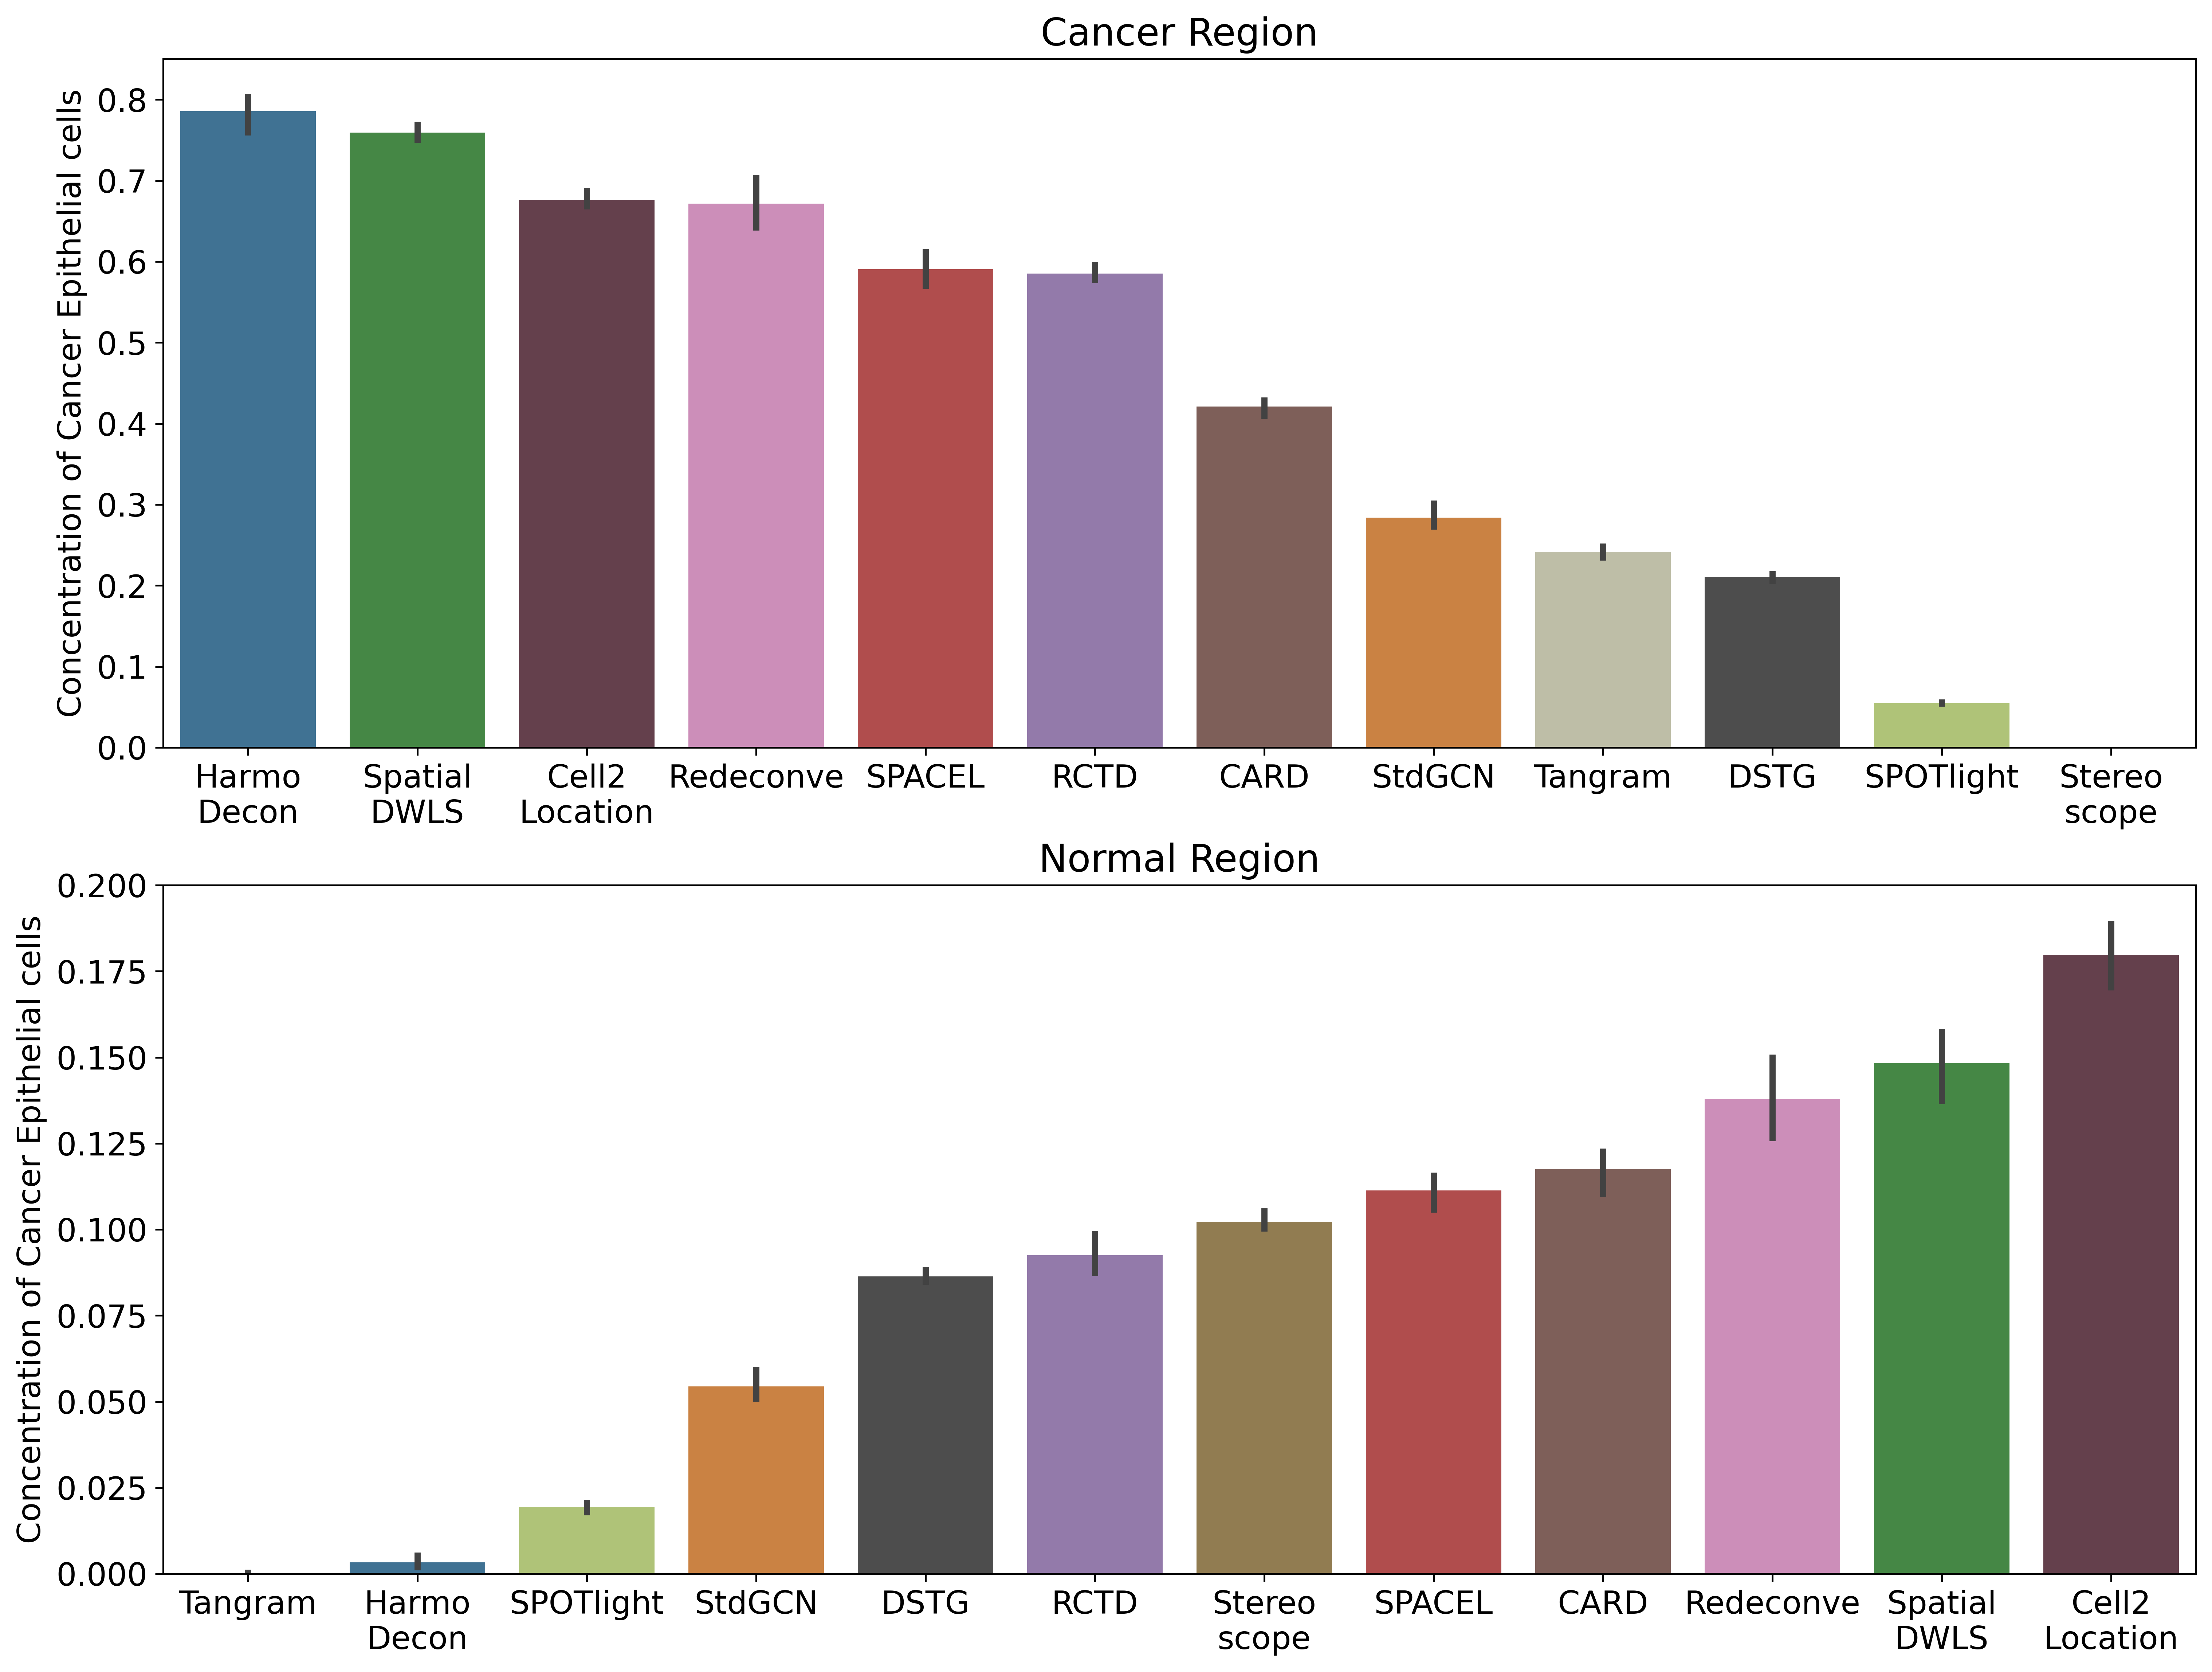

In [32]:
plt.rcParams.update({'font.size': 14})
fig,axes = plt.subplots(ncols=1,nrows=2,figsize=(16,12))
# for i, result in enumerate(result_list):
cancer = cancer_anno['cancer'] == 1
no_cancer = cancer_anno['cancer'] == 0
cancer_df = pd.DataFrame([harmo[cancer], stdgcn[cancer], dwls[cancer], spacel[cancer], rctd[cancer], redeconve[cancer], card[cancer], cell2location[cancer], spotlight[cancer], stereoscope[cancer], dstg[cancer], tangram[cancer]]).T
cancer_df.columns = ['Harmo\nDecon', 'StdGCN', 'Spatial\nDWLS', 'SPACEL', 'RCTD', 'Redeconve', 'CARD', 'Cell2\nLocation', 'SPOTlight', 'Stereo\nscope', 'DSTG', 'Tangram']
medians = cancer_df.median().sort_values(ascending=False)
order = medians.index.tolist()


no_cancer_df = pd.DataFrame([harmo[no_cancer], stdgcn[no_cancer], dwls[no_cancer], spacel[no_cancer], rctd[no_cancer], redeconve[no_cancer], card[no_cancer], cell2location[no_cancer], spotlight[no_cancer], stereoscope[no_cancer], dstg[no_cancer], tangram[no_cancer]]).T
no_cancer_df.columns = ['Harmo\nDecon', 'StdGCN', 'Spatial\nDWLS', 'SPACEL', 'RCTD', 'Redeconve', 'CARD', 'Cell2\nLocation', 'SPOTlight', 'Stereo\nscope', 'DSTG', 'Tangram']
medians = no_cancer_df.median().sort_values()
order_no = medians.index.tolist()

color_mapping = {
    "Harmo\nDecon": "#3275a1",
    "StdGCN": "#e1812c",
    "Spatial\nDWLS": "#3a923a",
    "SPACEL": "#c03d3d",
    "RCTD": "#9372b2",
    "CARD": "#845b53",
    "Redeconve": "#d684bd",
    "Cell2\nLocation": "#6a3a4a",
    "SPOTlight": "#b5cf6b",
    "Stereo\nscope": "#9c7f46",
    "DSTG": "#4d4d4d",
    "Tangram": "#c2c2a3"
}

sns.barplot(data=cancer_df, ax=axes[0], estimator="median", order=order, palette=color_mapping)
sns.barplot(data=no_cancer_df, ax=axes[1], estimator="median", order=order_no, palette=color_mapping)

# sns.catplot(data=harmo[cancer], ax=axes[0], kind="bar")
# sns.catplot(data=harmo[no_cancer], ax=axes[1], kind="bar")
# print(result_cancer.median(), result_no.median())
# statistic, p_value = stats.ttest_ind(result_cancer, result_no)
axes[0].set_title("Cancer Region")
# axes[0].set_xticks(ticks=np.arange(len(name_list)) ,labels=name_list)
axes[0].set_ylim([0, 0.85])
axes[0].set_ylabel("Concentration of Cancer Epithelial cells")
axes[1].set_ylabel("Concentration of Cancer Epithelial cells")
axes[1].set_title("Normal Region")
# axes[1].set_xticks(ticks=np.arange(len(name_list)), labels=name_list)
axes[1].set_ylim([0, 0.2])
# axes[i].text(0.5, 0.92, f't: {statistic:.2e}', ha='center', va='center', transform=axes[i].transAxes, color='red')
# axes[i].text(0.5, 0.88, f'p: {p_value:.2e}', ha='center', va='center', transform=axes[i].transAxes, color='red')
plt.savefig(dir_out+'/box_plot_cancer_new.jpg',dpi=300,bbox_inches='tight')
plt.show()

In [33]:
tangram[no_cancer].median()

0.00024655359738205

In [34]:
tangram[cancer].median()

0.24170297623283465

In [35]:
tangram[cancer].countt()

AttributeError: 'Series' object has no attribute 'countt'

In [ ]:
cancer_list = [harmo[cancer], stdgcn[cancer], dwls[cancer], spacel[cancer], rctd[cancer], redeconve[cancer], card[cancer], cell2location[cancer], spotlight[cancer], stereoscope[cancer], dstg[cancer], tangram[cancer]]
name_list = ['HarmoDecon', 'StdGCN', 'SpatialDWLS', 'SPACEL', 'RCTD', 'Redeconve', 'CARD', 'Cell2Location', 'SPOTlight', 'Stereoscope', 'DSTG', 'Tangram']
for sample, name in zip(cancer_list, name_list):
    sns.histplot(data=sample, binwidth=0.05, binrange=[0,1.0])
    plt.xlabel("")
    plt.ylabel("")
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.savefig(dir_out + f"{name}_cancer.png")
    plt.show()
    plt.clf()

In [ ]:
harmo_df.columns = ['B cells', 'Dendritic cells', 'Endothelial cells', 'Cancer epithelial cells',
       'Fibroblasts', 'Monocytes and Macrophages', 'NK cells', 'PCs', 'PVL',
       'T cells CD4', 'T cells CD8']

In [ ]:
output_prefix = "breast_2_harmo"
plot_results_bulk_ST_by_spot(coordinates, harmo_df, dir_out, output_prefix, geometry='honeycomb', num_cols=4)